In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.stats import skew, kurtosis
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [ ]:
symbol = "BNBUSDT"
if not Path("Users").exists():  # Windows
    input_path = r"C:\Users\phamhoa\Downloads\thesis\data\Binance\agg\500"
    file_path = rf"{input_path}\{symbol}.csv"
else:  # Macbook
    input_path = "/Users/hoapham/Documents/Learning/thesis/data/Binance/agg/500"
    file_path = f"{input_path}/{symbol}.csv"
df = pd.read_csv(rf"{input_path}\{symbol}.csv")

## Macbook
# input_path = "/Users/hoapham/Documents/Learning/thesis/data/Binance/agg/500/VPIN"
# df = pd.read_csv(f"{input_path}/{symbol}.csv")

try:
    df = df.drop(columns=["Unnamed: 0"])
except:
    pass
df['Time'] = pd.to_datetime(df['Time'])

In [43]:
df.tail()

,Time,Buy,Sell,Price,BidPrice,AskPrice,Volume,VPIN,CDF
632,2025-09-06 03:44:24+00:00,2044.705558,1311.294442,858.377442,858.444184,858.273370,3356.0,0.153843,0.801020
633,2025-09-06 04:04:29+00:00,1595.687000,1760.313000,859.023810,859.150403,858.909056,3356.0,0.152954,0.790816
634,2025-09-06 04:31:45+00:00,2023.063992,1332.936008,858.862635,858.915534,858.782347,3356.0,0.153817,0.799320
635,2025-09-06 04:49:39+00:00,1810.571153,1545.428847,857.136780,856.992857,857.305396,3356.0,0.149545,0.755102
636,2025-09-06 05:44:22+00:00,1440.601345,1915.398655,857.654130,857.670795,857.641596,3356.0,0.147919,0.727891


# Tính ROLL
$$
\text{Spread} = 2 \times \sqrt{|\text{Cov}(\Delta P_{\tau}, \Delta P_{\tau-1})|}
$$


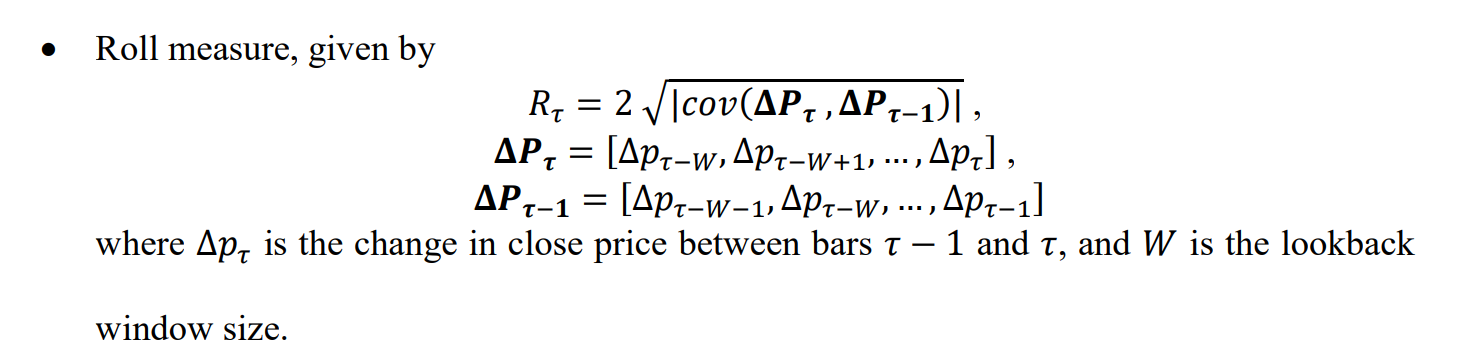

In [ ]:
def roll_measure(DeltaPriceSeries):
    x = DeltaPriceSeries[1:] # delta P_t
    y = DeltaPriceSeries[:-1] # delta P_{t-1}
    cov = x.cov(y)
    return 2*np.sqrt(abs(cov))
df["DeltaPrice"] = df['Price'].diff()
# Vì theo công thức và ghi chú, đang rolling trên DeltaPrice, nên sẽ dùng DeltaPrice để tính ROLL với window = 50
df["RollMeasure"] = df["DeltaPrice"].rolling(window=50).apply(roll_measure, raw=False) 
df.tail()

,Time,Buy,Sell,Price,BidPrice,AskPrice,Volumn,VPIN,CDF,Returns,Volatility,Skewness,Kurtosis,Normality_p,DeltaPrice,RollMeasure
632,2025-09-06 03:44:24+00:00,2044.705558,1311.294442,858.377442,858.444184,858.273370,3356.0,0.153843,0.801020,0.001201,0.001775,-0.639424,0.951642,0.042338,1.030038,3.074574
633,2025-09-06 04:04:29+00:00,1595.687000,1760.313000,859.023810,859.150403,858.909056,3356.0,0.152954,0.790816,0.000753,0.001776,-0.651813,0.954471,0.039488,0.646368,3.082314
634,2025-09-06 04:31:45+00:00,2023.063992,1332.936008,858.862635,858.915534,858.782347,3356.0,0.153817,0.799320,-0.000188,0.001778,-0.627685,0.922680,0.047030,-0.161175,3.034412
635,2025-09-06 04:49:39+00:00,1810.571153,1545.428847,857.136780,856.992857,857.305396,3356.0,0.149545,0.755102,-0.002009,0.001781,-0.627029,0.902320,0.048662,-1.725855,3.006962
636,2025-09-06 05:44:22+00:00,1440.601345,1915.398655,857.654130,857.670795,857.641596,3356.0,0.147919,0.727891,0.000604,0.001765,-0.694125,1.090313,0.025532,0.517350,3.050420


# Tính Roll impact

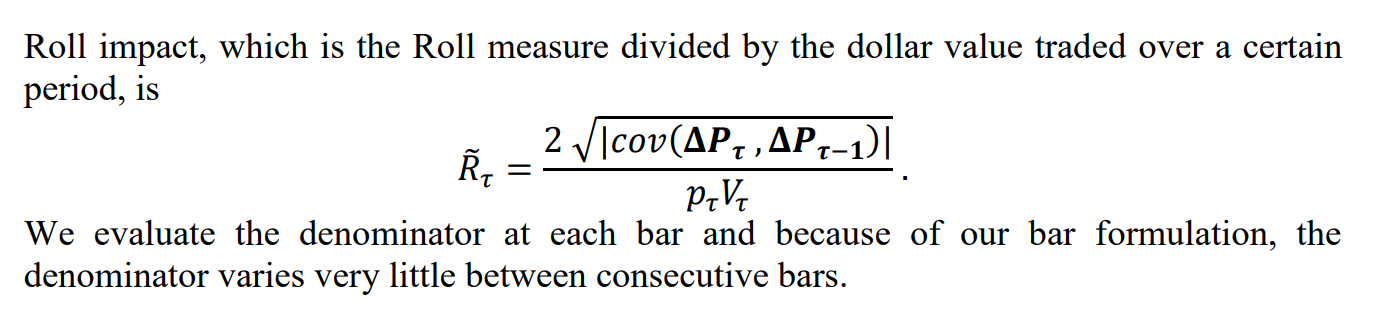